In [ ]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

#Change directory
os.chdir(r"C:\Users\Matome.Molokome\Desktop\Unisa\2021\HRCOS82 Research\favorita-grocery-sales-forecasting")

#Load Data
start_time = time.time()
chunk = pd.read_csv('train.csv',dtype={"id": object, "date": object,"store_nbr": object,"item_nbr": object,
                                         "unit_sales": float, "onpromotion": object
                                        },chunksize=1000000)


df = pd.concat(chunk)

end_time = time.time()

print ("Completed in",(end_time-start_time))


#df.sample(10)

In [ ]:
df.sample(10)
df.dtypes

In [ ]:
stores = pd.read_csv('stores.csv',dtype={"store_nbr": object})

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
stores ['type_numeric'] = labelencoder.fit_transform(stores ['type'])
stores ['city_numeric'] = labelencoder.fit_transform(stores ['city'])
stores ['state_numeric'] = labelencoder.fit_transform(stores ['state'])
stores

In [ ]:
oil = pd.read_csv('oil.csv')
print(oil)
oil.dtypes


In [ ]:
items = pd.read_csv('items.csv',dtype={"item_nbr": object})
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
items ['family_numeric'] = labelencoder.fit_transform(items ['family'])
print(items)
items.dtypes


In [ ]:
transactions = pd.read_csv('transactions.csv', dtype={"store_nbr": object})
print(transactions)
transactions.dtypes

In [ ]:
holidays_events = pd.read_csv('holidays_events.csv')
holidays_events ['Holiday'] = '1'
print(holidays_events)
holidays_events.dtypes

In [ ]:
#Filter Dataset
traindata = df[df.date >= '2017-08-01']
traindata.isnull().sum()

In [ ]:
#Encoding

#Dictionary
encoding_nums = {"onpromotion":     {"True": 1, "False": 0}}

#FindandReplace
traindata = traindata.replace(encoding_nums)

In [ ]:
traindata.sample(10)

In [ ]:
#Join Dimensions
traindata = pd.merge(traindata, items, on='item_nbr', how='left')
traindata = pd.merge(traindata, stores , on='store_nbr', how='left')
traindata = pd.merge(traindata, holidays_events , on='date', how='left')
traindata = pd.merge(traindata, oil , on='date', how='left')
traindata = pd.merge(traindata, transactions , on= ['date','store_nbr'], how='left')


traindata.sample(10)

In [ ]:
#drop columns
traindata.drop(['id', 'family','type_y','locale','locale_name','description','transferred','state','city','type_x'],
               axis=1,inplace=True)
traindata.sample(10)


In [ ]:
#Cleaning data 

#replace NAN with zero
traindata['Holiday'] = traindata['Holiday'].fillna(0)




In [ ]:
traindata.sample(10)

In [ ]:
#Cleaning data 
#replace NAN with mean
dcoilwtico_mean =traindata['dcoilwtico'].mean()
traindata['dcoilwtico'] = traindata['dcoilwtico'].fillna(dcoilwtico_mean)

In [ ]:
#Check negative sales
traindata[traindata['unit_sales'] < 0]

In [ ]:
#cleaning Data
# Drop Negative sales
traindata.drop(traindata[traindata['unit_sales'] < 0].index, inplace = True)

In [ ]:
#Check negative sales
traindata[traindata['unit_sales'] < 0]

In [ ]:
traindata.sample(10)

In [33]:
#Feature Engineering
traindata['date'] = pd.to_datetime(traindata['date'], errors='coerce')
traindata ['month'] = traindata['date'].dt.month
traindata ['dayofthemonth'] = traindata['date'].dt.day
traindata ['dayofweek'] = traindata['date'].dt.dayofweek
traindata.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions,month,dayofthemonth,dayofweek
1084938,2017-08-11,20,1040170,2.0,0,2222,0,11,6,1,18,12,1,48.810000,1751,8,11,4
278183,2017-08-03,36,564272,3.0,0,1016,0,12,10,4,11,6,0,49.030000,1090,8,3,3
250632,2017-08-03,19,108698,1.0,0,2644,1,9,15,2,7,1,0,49.030000,1010,8,3,3
624928,2017-08-06,46,2008562,7.0,0,3020,0,7,14,0,18,12,0,48.908317,4400,8,6,6
977329,2017-08-10,15,155610,2.0,0,1034,0,12,15,2,9,7,1,48.540000,1355,8,10,3
124357,2017-08-02,7,1229025,4.0,0,4176,0,25,8,3,18,12,0,49.600000,1849,8,2,2
35700,2017-08-01,18,2060910,20.0,1,1126,0,3,16,1,18,12,0,49.190000,1499,8,1,1
119693,2017-08-02,5,1146801,9.0,0,1040,0,12,4,3,21,14,0,49.600000,1411,8,2,2
1480677,2017-08-15,6,1960591,2.0,0,2074,1,30,13,3,18,12,1,47.570000,1589,8,15,1
729754,2017-08-07,46,1464239,1.0,0,1144,0,3,14,0,18,12,0,49.370000,3333,8,7,0


In [35]:
# Separate features and labels
X, y = traindata[['month','store_nbr', 'item_nbr','onpromotion','perishable','class','family_numeric','cluster','type_numeric','city_numeric','state_numeric','Holiday','dcoilwtico','transactions','dayofthemonth','dayofweek']].values, traindata['unit_sales'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[8 '1' '103520' 0 0 1028 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '103665' 0 1 2712 5 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105574' 0 0 1045 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105575' 0 0 1045 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105693' 0 0 1034 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105737' 0 0 1044 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105857' 0 0 1092 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '106716' 0 0 1032 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '108079' 0 0 1030 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '108696' 0 1 2636 9 13 3 18 12 0 49.19 1795 1 1]]

Labels:
[ 3.  4.  8. 14.  1.  1.  6.  5.  2.  1.]


In [36]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 1099595 rows
Test Set: 471255 rows


Best parameter combination: {'learning_rate': 1.0, 'n_estimators': 150} 

GradientBoostingRegressor(learning_rate=1.0, n_estimators=150) 

MSE: 427.6161714396469
RMSE: 20.67888225798597
R2: 0.24392089203944722


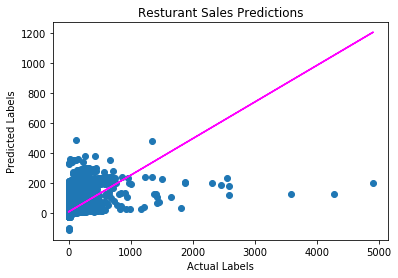

In [42]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)
#Visualise Traininign vs actual using scatter plot
%matplotlib inline

#Evaluation Matrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)
 #Plot Predicted vs Actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Resturant Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()